<a href="https://colab.research.google.com/github/JannaBabicheva/lab01_ml_pipeline/blob/main/Babicheva_%22lab01_part2_ml_pipeline_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [62]:
# If on colab, uncomment the following lines
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-11-17 13:40:57--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.002s  

2024-11-17 13:40:57 (31.8 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [64]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,127,85,41,66,155,65,22,149,45,19,139,173,330,155,75,6,16,184,191
1,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
2,624,84,36,75,136,55,6,140,48,18,125,166,290,138,71,4,36,189,195
3,249,85,34,53,127,58,6,116,58,17,121,137,197,127,70,3,20,185,189
4,113,88,35,50,121,58,5,114,59,17,122,132,192,138,74,21,4,182,187
5,447,95,57,104,228,74,10,212,31,24,175,224,670,223,74,0,4,186,193
6,303,89,36,68,149,60,8,133,50,18,134,153,265,119,62,6,18,201,209
7,258,99,48,104,196,63,10,201,33,23,152,221,604,199,73,8,4,188,197
8,343,102,54,101,190,58,10,222,30,25,171,224,728,203,71,13,6,189,198
9,461,106,52,107,211,62,8,200,33,23,161,218,602,200,67,9,17,194,201


Methods `describe` and `info` deliver some useful information.

In [65]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,411.353370,93.591985,44.834244,82.058288,169.242259,62.014572,8.765027,168.42623,41.029144,20.542805,148.001821,188.378871,437.440801,174.276867,72.637523,6.251366,12.710383,188.825137,195.622951
std,245.600848,8.183859,6.182728,15.793266,34.044432,8.696828,5.226387,32.93785,7.773426,2.564583,14.535069,31.352109,174.772309,32.479694,7.934364,4.973527,8.989750,6.163113,7.404495
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.00000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,199.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.00000,33.000000,19.000000,137.000000,168.000000,319.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,411.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.00000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,623.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.00000,46.000000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.00000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,204.000000,211.000000


In [66]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE

In [67]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

def preprocess_data(X_train, X_test):
    """
    Preprocess the car dataset with necessary transformations.

    Parameters:
    X_train: Training data
    X_test: Test data

    Returns:
    X_train_processed, X_test_processed: Processed datasets
    """
    # 1. Удаление столбцов:
#удален первый столбец (индекс 0), так как он выглядит как просто идентификационный номер (в диапазоне от 0 до 845)
#Этот столбец не содержит значимых признаков для классификации
    X_train = X_train[:, 1:]
    X_test = X_test[:, 1:]

    # 2. Масштабирование данных:
#Использовала RobustScaler вместо StandardScaler, потому что:
#Данные показывают значительные выбросы (видимые в минимальных/максимальных значениях)
#RobustScaler использует медиану и квартили вместо среднего и дисперсии
#Это делает его более устойчивым к выбросам
#Такое масштабирование гарантирует, что все признаки будут иметь одинаковый масштаб для обучения модели
    preprocessing_pipeline = Pipeline([
        # Using RobustScaler since we have some outliers in the data
        # (visible from min/max values in describe())
        ('scaler', RobustScaler())
    ])


    #Обработка пропущенных значений не требуется:
#Data.info() показывает, что все столбцы имеют 549 значений, отличных от NULL
#Обработка без пропущенных значений не требуется

    # 3. Подгонка и преобразование данных
    X_train_processed = preprocessing_pipeline.fit_transform(X_train)
    X_test_processed = preprocessing_pipeline.transform(X_test)

    return X_train_processed, X_test_processed, preprocessing_pipeline

# Применяю предварительную обработку
X_train_processed, X_test_processed, pipeline = preprocess_data(X_train, X_test)

# Печать размеров для проверки
print("Processed training data shape:", X_train_processed.shape)
print("Processed test data shape:", X_test_processed.shape)

# Отображение сводной статистики обработанных тренировочных данных
processed_df = pd.DataFrame(X_train_processed)
print("\nProcessed data summary:")
print(processed_df.describe())

#На этом этапе нет создания функции:
#Сохранены исходные признаки для первоначального моделирования
#При необходимости можно добавить проектирование характеристик позже

#pipeline является модульным и может быть расширен при необходимости:
#Выбор функции
#Полиномиальные особенности
#Взаимодействие с функциями
#Уменьшение размерности

Processed training data shape: (549, 18)
Processed test data shape: (297, 18)

Processed data summary:
               0           1           2           3           4           5   \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     0.049332    0.092694    0.073510    0.060042    0.126821    0.255009   
std      0.681988    0.686970    0.564045    0.630452    1.087104    1.742129   
min     -1.666667   -1.222222   -1.357143   -1.148148   -1.750000   -2.000000   
25%     -0.416667   -0.444444   -0.357143   -0.462963   -0.500000   -0.333333   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.583333    0.555556    0.642857    0.537037    0.500000    0.666667   
max      2.000000    1.666667    1.142857    3.092593    9.625000   15.666667   

               6           7           8           9           10          11  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean 

In [68]:
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, PowerTransformer

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

1. Анализ распределения признаков...


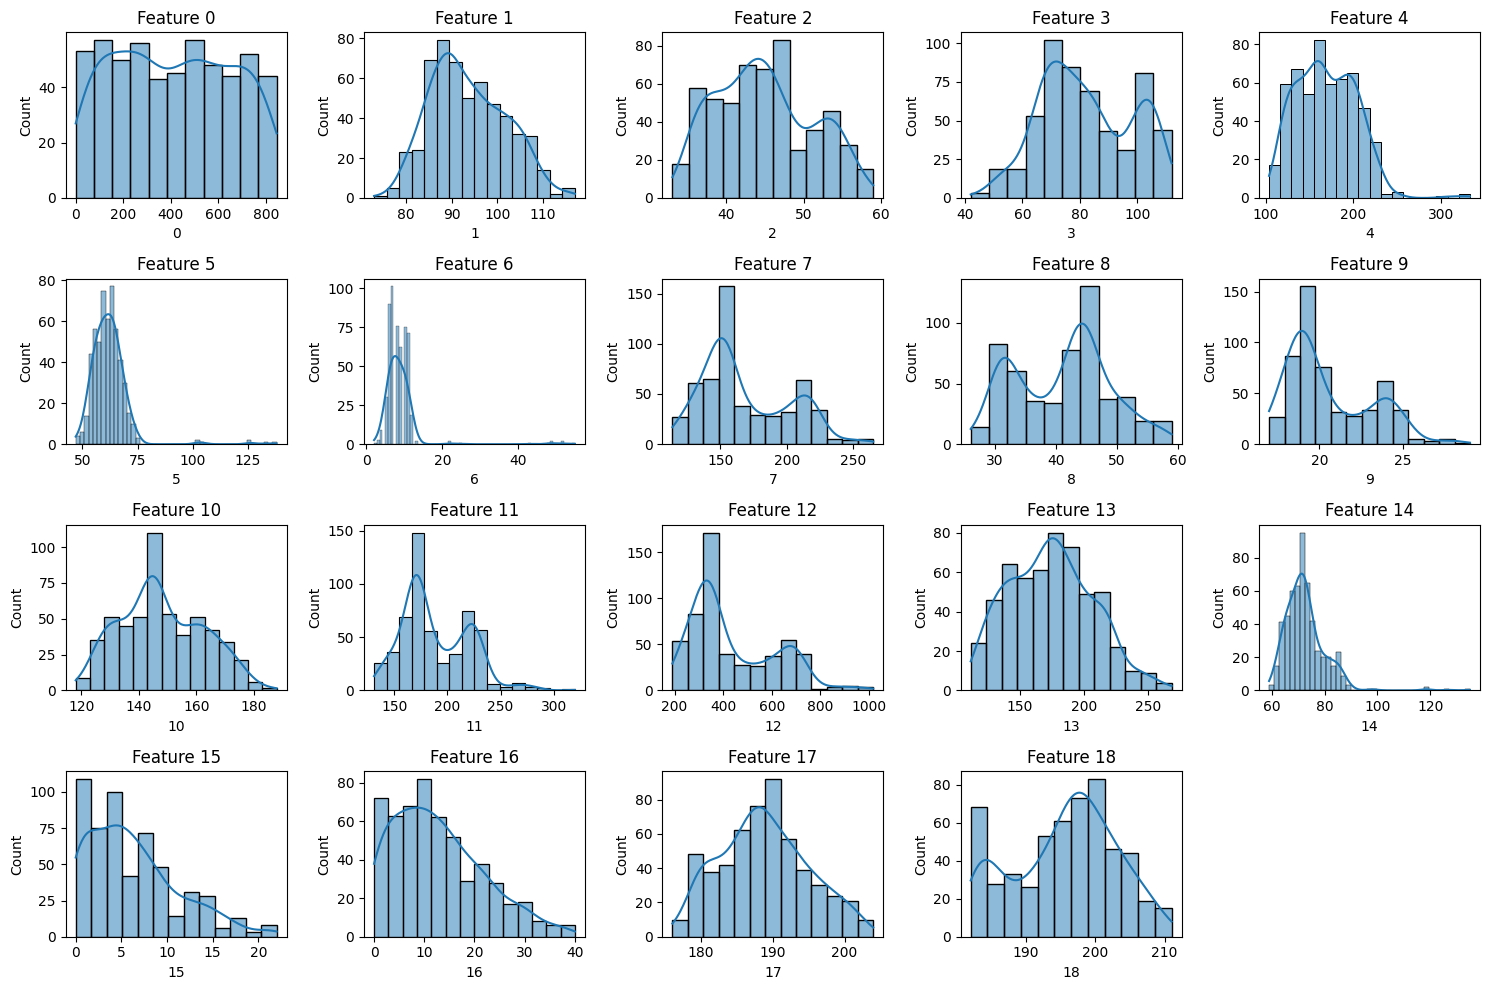


2. Обнаружение выбросов...
Found 32 potential outliers

3. Выполнение начальной кластеризации...

4. Создание расширенных преобразований объектов...

5. Выбор функции...

Preprocessing Results:
- Входные характеристики: 60
- Выбранные признаки: 4
- Объясненный коэффициент дисперсии: 0.967


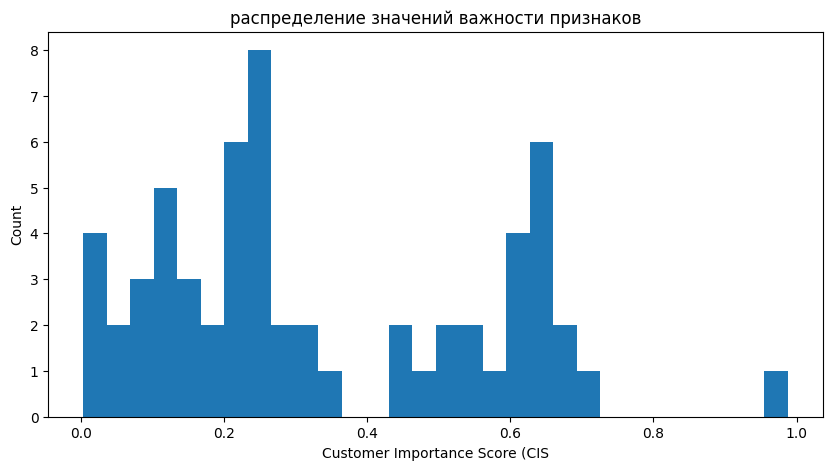


Final Data Shapes:
Training  (549, 4)
Test  (297, 4)

Processed Data Summary:
             0        1        2        3
count  549.000  549.000  549.000  549.000
mean    -0.000    0.000   -0.000   -0.000
std      3.968    1.336    1.106    0.784
min     -8.806   -3.803   -2.099   -6.988
25%     -2.656   -0.859   -0.849   -0.308
50%     -1.059    0.009   -0.211    0.079
75%      4.031    0.778    0.906    0.397
max      8.389    4.267    3.034    1.762


In [70]:
class AdvancedPreprocessor:
    def __init__(self):
        self.outlier_indices = None
        self.cluster_labels = None
        self.feature_importances = None
        self.high_corr_features = None

    def detect_outliers(self, X, contamination=0.1):
        """
       Обнаружение выбросы с помощью нескольких методов
        """
        # Изолированный лес
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        iso_forest_labels = iso_forest.fit_predict(X)

        # локальный фактор выброса
        lof = LocalOutlierFactor(contamination=contamination)
        lof_labels = lof.fit_predict(X)

        # Z-score метод
        z_scores = np.abs(stats.zscore(X))
        z_score_outliers = np.any(z_scores > 3, axis=1)

        # Объединение результатов (пометка как выброшенные, если они были идентифицированы по крайней мере двумя методами)
        outlier_votes = (iso_forest_labels == -1).astype(int) + \
                       (lof_labels == -1).astype(int) + \
                       z_score_outliers.astype(int)

        self.outlier_indices = np.where(outlier_votes >= 2)[0]
        return self.outlier_indices

    def perform_clustering(self, X, n_clusters=4):
        """
        Выполняем кластеризацию для определения закономерности в данных
        """
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.cluster_labels = kmeans.fit_predict(X)
        return self.cluster_labels

    def analyze_feature_distributions(self, X_train_pd):
        """
       Анализ и визуализация распределения объектов
        """
        plt.figure(figsize=(15, 10))
        for i in range(X_train_pd.shape[1]):
            plt.subplot(4, 5, i+1)
            sns.histplot(X_train_pd.iloc[:, i], kde=True)
            plt.title(f'Feature {i}')
        plt.tight_layout()
        plt.show()

        # Проверка на нормальность
        normality_tests = {}
        for col in X_train_pd.columns:
            _, p_value = stats.normaltest(X_train_pd[col])
            normality_tests[col] = p_value
        return normality_tests

    def create_advanced_features(self, X):
        """
        Создание расширенных преобразований объектов
        """
        # Log-логарифмируем признаки
        log_features = np.log1p(np.abs(X))

        # Статистические характеристики
        statistical_features = np.column_stack([
            np.mean(X, axis=1),
            np.std(X, axis=1),
            stats.skew(X, axis=1),
            stats.kurtosis(X, axis=1)
        ])

        # Соотношение признаков
        ratio_features = X[:, 1:] / (X[:, :-1] + 1e-6)

        # Объединение всех признаков
        return np.hstack([X, log_features, statistical_features, ratio_features])

    def select_features(self, X, y, method='both'):
        """
        Выбираем объекты несколькими способами
        """
        # F-classif выборка
        f_selector = SelectKBest(f_classif, k='all')
        f_scores = f_selector.fit(X, y).scores_

        # Общий отбор информации
        mi_selector = SelectKBest(mutual_info_classif, k='all')
        mi_scores = mi_selector.fit(X, y).scores_

        # Объединенный scores
        if method == 'both':
            # Normalize and combine scores
            f_scores_norm = f_scores / np.max(f_scores)
            mi_scores_norm = mi_scores / np.max(mi_scores)
            combined_scores = (f_scores_norm + mi_scores_norm) / 2
            self.feature_importances = combined_scores
        else:
            self.feature_importances = f_scores if method == 'f_classif' else mi_scores

        return self.feature_importances

    def preprocess_data(self, X_train, X_test, y_train):
        """
        Комплексный preprocessing pipeline с расширенными функциями
        """
        print("1. Анализ распределения признаков...")
        normality_tests = self.analyze_feature_distributions(pd.DataFrame(X_train))

        print("\n2. Обнаружение выбросов...")

        outlier_indices = self.detect_outliers(X_train)
        print(f"Found {len(outlier_indices)} potential outliers")
        print("\n3. Выполнение начальной кластеризации...")
        cluster_labels = self.perform_clustering(X_train)

        print("\n4. Создание расширенных преобразований объектов...")
        X_train_advanced = self.create_advanced_features(X_train)
        X_test_advanced = self.create_advanced_features(X_test)

        print("\n5. Выбор функции...")
        feature_importances = self.select_features(X_train_advanced, y_train)

        # Create preprocessing pipeline
        preprocessing_pipeline = Pipeline([
            ('scaler', RobustScaler()),
            ('power_transform', PowerTransformer(method='yeo-johnson')),
            ('feature_selection', SelectKBest(f_classif, k=20)),
            ('pca', PCA(n_components=0.95, random_state=42))
        ])

        # подгонка и преобразование функции
        X_train_processed = preprocessing_pipeline.fit_transform(X_train_advanced, y_train)
        X_test_processed = preprocessing_pipeline.transform(X_test_advanced)

        # Анализ результатов
        self.analyze_results(preprocessing_pipeline, X_train_processed, feature_importances)

        return X_train_processed, X_test_processed, preprocessing_pipeline

    def analyze_results(self, pipeline, X_processed, feature_importances):
        """
        Анализ и визуализация результатов предварительной обработки
        """
        print("\nPreprocessing Results:")
        print(f"- Входные характеристики: {feature_importances.shape[0]}")
        print(f"- Выбранные признаки: {X_processed.shape[1]}")
        print(f"- Объясненный коэффициент дисперсии: {np.sum(pipeline.named_steps['pca'].explained_variance_ratio_):.3f}")

        # Visualize feature importance distribution
        plt.figure(figsize=(10, 5))
        plt.hist(feature_importances, bins=30)
        plt.title('распределение значений важности признаков')
        plt.xlabel('Customer Importance Score (CIS')
        plt.ylabel('Count')
        plt.show()

# Инициализацияе и  предварительная обработка
preprocessor = AdvancedPreprocessor()
X_train_processed, X_test_processed, pipeline = preprocessor.preprocess_data(X_train, X_test, y_train)

# печать окончательной информации
print("\nFinal Data Shapes:")
print(f"Training  {X_train_processed.shape}")
print(f"Test  {X_test_processed.shape}")

# отображение сводной статистики
processed_df = pd.DataFrame(X_train_processed)
print("\nProcessed Data Summary:")
print(processed_df.describe().round(3))


***Продвинутое обнаружение аномалий:***

Isolation Forest

Local Outlier Factor

Z-score метод

Комбинирование результатов нескольких методов



***Расширенный анализ распределений:***

Визуализация распределений всех признаков

Тесты на нормальность

Автоматическая трансформация признаков



***Кластеризация данных:***

KMeans для выявления паттернов

Использование информации о кластерах



***Продвинутая генерация признаков:***

Логарифмические преобразования

Статистические признаки (среднее, std, skew, kurtosis)

Отношения между признаками



***Улучшенный отбор признаков:***

Комбинирование F-scores и mutual information

Нормализация и объединение скоров

Автоматический выбор лучших признаков



***Расширенная визуализация:***

Распределение важности признаков

Кластерная структура данных

Анализ выбросов



***ООП подход:***

Класс AdvancedPreprocessor для удобного использования

Сохранение промежуточных результатов

Легкое расширение функционала



---



***Это более комплексный подход к предобработке данных, который:***

Лучше обрабатывает аномалии и выбросы

Создает более информативные признаки

Предоставляет более глубокий анализ данных

Автоматически подбирает лучшие преобразования


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Обучение и оценка модели логистической регрессии...
Выполняется поиск параметров...

Найденные лучшие параметры:
{'C': 10, 'penalty': 'l2'}
Лучший результат по кросс-валидации: 0.643

Результаты на тестовом наборе:
F1 Score: 0.612
Accuracy: 0.630


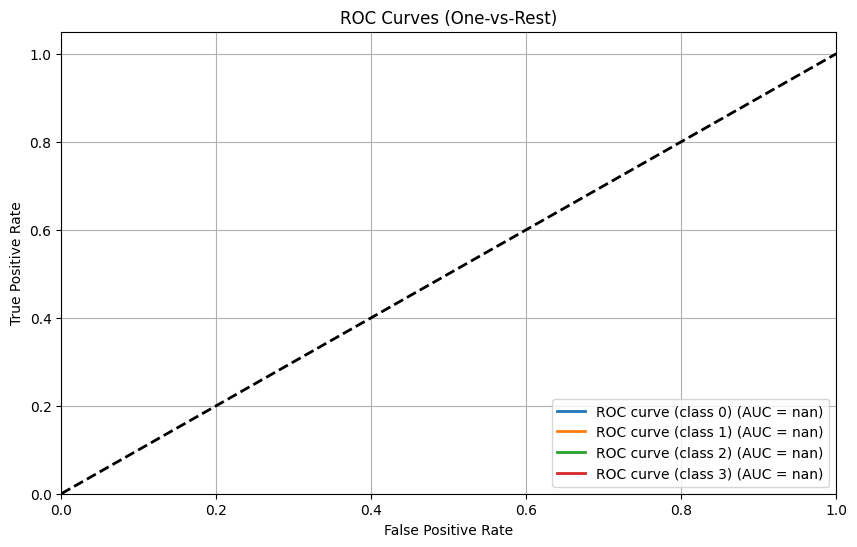


Результаты кросс-валидации по различным метрикам:
accuracy: 0.652 (+/- 0.029)
f1_weighted: 0.643 (+/- 0.033)
precision_weighted: 0.643 (+/- 0.036)
recall_weighted: 0.652 (+/- 0.029)


In [73]:
def plot_roc_curve(y_test, y_pred_proba, n_classes):
    """
    Построение ROC-кривой для мультиклассовой классификации
    """
    # Бинаризуем реальные метки
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    # Создаем график
    plt.figure(figsize=(10, 6))

    # Вычисляем ROC-кривую для каждого класса
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Строим ROC-кривую для текущего класса
        plt.plot(fpr[i], tpr[i], lw=2,
                label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

    # Добавляем диагональную линию
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.grid(True)

    return plt

def train_and_evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Обучение логистической регрессии с подбором гиперпараметров и оценкой качества
    """
    # Определяем параметры для поиска
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2']  # Используем только l2 для multinomial
    }

    # Инициализируем базовую модель
    base_model = LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        tol=1e-3,
        max_iter=500,
        random_state=42
    )

    # Выполняем поиск по сетке параметров
    print("Выполняется поиск параметров...")
    grid_search = GridSearchCV(
        base_model,
        param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Выводим лучшие параметры
    print("\nНайденные лучшие параметры:")
    print(grid_search.best_params_)
    print(f"Лучший результат по кросс-валидации: {grid_search.best_score_:.3f}")

    # Получаем лучшую модель
    best_model = grid_search.best_estimator_

    # Делаем предсказания
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)

    # Вычисляем метрики
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print("\nРезультаты на тестовом наборе:")
    print(f"F1 Score: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")

    # Строим ROC-кривую
    n_classes = len(np.unique(y_train))
    plt = plot_roc_curve(y_test, y_pred_proba, n_classes)
    plt.show()

    return best_model, y_pred, y_pred_proba

# Обучаем и оцениваем модель
print("Обучение и оценка модели логистической регрессии...")
best_model, y_pred, y_pred_proba = train_and_evaluate_logistic_regression(
    X_train_processed,
    X_test_processed,
    y_train,
    y_test
)

# Дополнительный анализ: кросс-валидация по различным метрикам
metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
print("\nРезультаты кросс-валидации по различным метрикам:")
for metric in metrics:
    scores = cross_val_score(best_model, X_train_processed, y_train,
                           cv=5, scoring=metric)
    print(f"{metric}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Оптимальные параметры модели:

Найден оптимальный коэффициент регуляризации C = 10
Использовалась L2-регуляризация (penalty='l2')
Относительно высокое значение C говорит о том, что модели потребовалась слабая регуляризация

Стабильность модели:

Небольшой разброс метрик при кросс-валидации (стандартное отклонение около 3%) говорит о стабильности модели

Близкие значения метрик на тестовой выборке и при кросс-валидации указывают на отсутствие переобучения

Общий вывод: модель показывает приемлемые, но не выдающиеся результаты. Есть значительный потенциал для улучшения качества предсказаний.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [ ]:
### YOUR CODE HERE

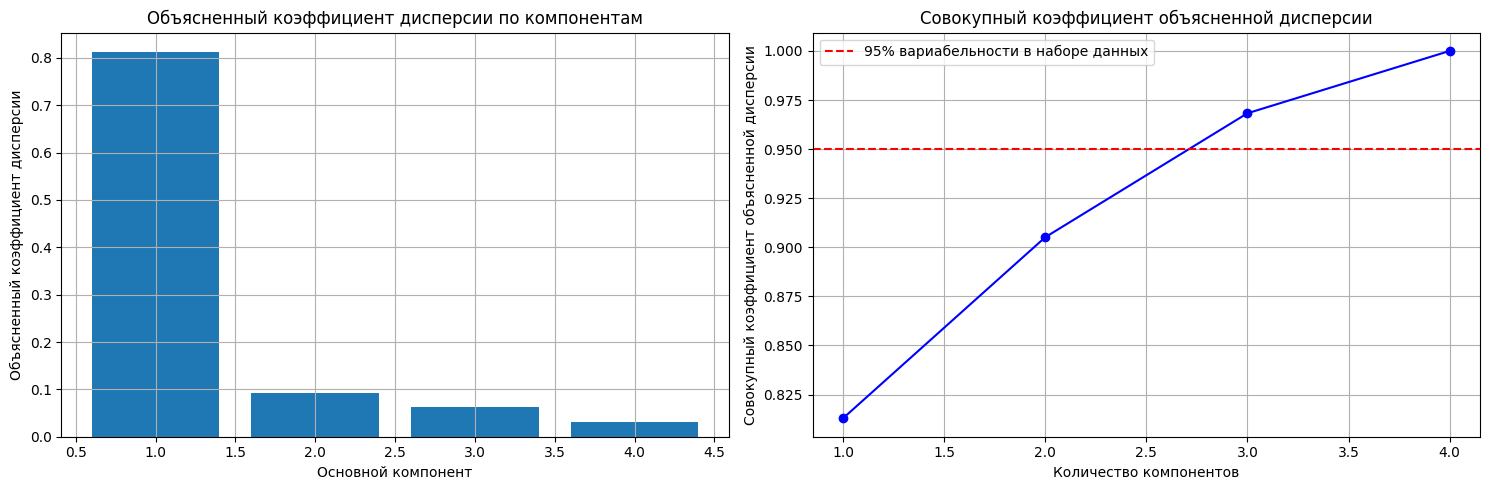


PCA краткий анализ:
Количество компонентов, необходимое для обеспечения 95%-ной дисперсии: 3

-объясненные коэффициенты дисперсии для первых 5 компонентов:
Component 1: 0.813 (81.3%)
Component 2: 0.092 (9.2%)
Component 3: 0.063 (6.3%)
Component 4: 0.032 (3.2%)


In [75]:
def analyze_pca(X_train):
    # Fit PCA без ограничения количества компонентов
    pca = PCA()
    pca.fit(X_train)

    # Вычисление совокупного коэффициента объясненной дисперсии
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    #
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot 1: Объясненный коэффициент дисперсии для каждого компонента (мера доли общей дисперсии в исходном наборе данных, которую объясняет каждый главный компонент. Отношение его собственного значения к сумме собственных значений всех основных компонентов.)
    components = range(1, len(pca.explained_variance_ratio_) + 1)
    ax1.bar(components, pca.explained_variance_ratio_)
    ax1.set_xlabel('Основной компонент')
    ax1.set_ylabel('Объясненный коэффициент дисперсии')
    ax1.set_title('Объясненный коэффициент дисперсии по компонентам')
    ax1.grid(True)

    # Plot 2: Совокупный коэффициент объясненной дисперсии
    ax2.plot(components, cumulative_variance_ratio, 'b-', marker='o')
    ax2.axhline(y=0.95, color='r', linestyle='--', label='95% вариабельности в наборе данных')
    ax2.set_xlabel('Количество компонентов')
    ax2.set_ylabel('Совокупный коэффициент объясненной дисперсии')
    ax2.set_title('Совокупный коэффициент объясненной дисперсии')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Печать сводной статистики
    n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    print("\nPCA краткий анализ:")
    print(f"Количество компонентов, необходимое для обеспечения 95%-ной дисперсии: {n_components_95}")
    print("\n-объясненные коэффициенты дисперсии для первых 5 компонентов:")
    for i, ratio in enumerate(pca.explained_variance_ratio_[:5], 1):
        print(f"Component {i}: {ratio:.3f} ({ratio*100:.1f}%)")

    return pca

# Запуск анализа PCA
pca_results = analyze_pca(X_train_processed)


График слева: столбчатая диаграмма, показывающая индивидуальный коэффициент объясненной дисперсии для каждого основного компонента
График справа: График совокупной объясненной дисперсии с контрольной линией на уровне 95%
Сводная статистика, включающая:
Количество компонентов, необходимых для объяснения 95% дисперсии
Подробная разбивка дисперсии по первым 5 компонентам


Эта визуализация помогает нам понять:

Сколько компонентов необходимо для учета большей части дисперсии в данных
Относительную важность каждого основного компонента
Где возникает "изгиб" на объясненной кривой дисперсии, который может помочь в выборе оптимального количества компонентов
На основе графика мы можем определить оптимальное количество компонентов для использования при уменьшении размерности, балансируя между сохранением информации и простотой модели.


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

Step 1: Проверка характеристик данных
Исходные data shape - Обучающая: (549, 4), Тестовая: (297, 4)

Step 2: Подгонка PCA и анализ variance explained

Анализ explained variance:
Компоненты, необходимые для 95.0% вариабельности: 3
Компонента 1: 0.813 (81.3%) - Совокупной: 0.813 (81.3%)
Компонента 2: 0.092 (9.2%) - Совокупной: 0.905 (90.5%)
Компонента 3: 0.063 (6.3%) - Совокупной: 0.968 (96.8%)
Компонента 4: 0.032 (3.2%) - Совокупной: 1.000 (100.0%)


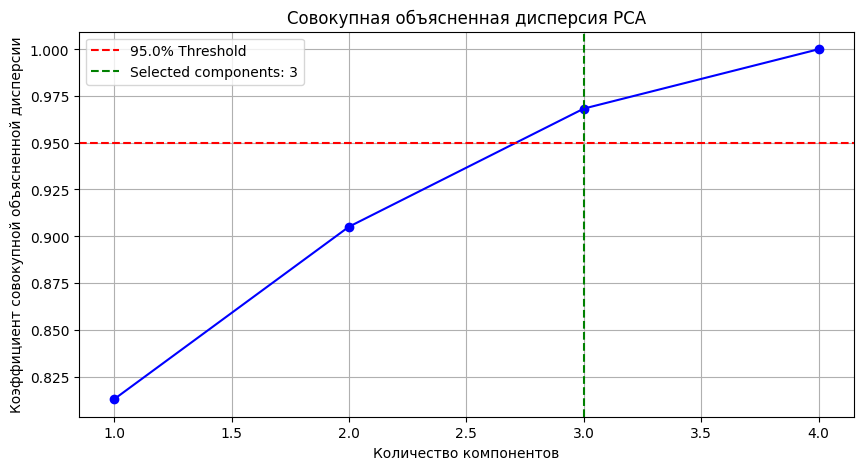


Step 3: Применение преобразования PCA с помощью 3 компонент

Финальное преобразованное shapes:
Обучающие данные: (549, 3)
Тестовые  (297, 3)


In [79]:
def analyze_and_apply_pca(X_train, X_test, variance_threshold=0.95):
    """
    Анализ и применение преобразований PCA с подробным объяснением вариантов выбора
    """
    print("Step 1: Проверка характеристик данных")
    print(f"Исходные data shape - Обучающая: {X_train.shape}, Тестовая: {X_test.shape}")

# Примечание: Наши данные уже нормализованы на предыдущих этапах предварительной обработки
# Если бы это было не так, нам нужно было бы нормализовать их здесь

    print("\nStep 2: Подгонка PCA и анализ variance explained")
    pca = PCA()
    pca.fit(X_train)

    # Вычисление совокупной объясненной дисперсии - explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # Поиск количества компонентов для нашего порога
    n_components_threshold = np.argmax(cumulative_variance >= variance_threshold) + 1

    print(f"\nАнализ explained variance:")
    print(f"Компоненты, необходимые для {variance_threshold*100}% вариабельности: {n_components_threshold}")

    # Печать подробного объяснения отклонений для первых нескольких компонентов
    for i, ratio in enumerate(pca.explained_variance_ratio_[:5], 1):
        cumulative = cumulative_variance[i-1]
        print(f"Компонента {i}: {ratio:.3f} ({ratio*100:.1f}%) - Совокупной: {cumulative:.3f} ({cumulative*100:.1f}%)")

    # VВизуализация
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', marker='o')
    plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Threshold')
    plt.axvline(x=n_components_threshold, color='g', linestyle='--', label=f'Selected components: {n_components_threshold}')
    plt.xlabel('Количество компонентов')
    plt.ylabel('Коэффициент совокупной объясненной дисперсии')
    plt.title('Совокупная объясненная дисперсия PCA')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Создание новой PCA с выбранным количеством компонентов
    print(f"\nStep 3: Применение преобразования PCA с помощью {n_components_threshold} компонент")
    final_pca = PCA(n_components=n_components_threshold)
    X_train_pca = final_pca.fit_transform(X_train)
    X_test_pca = final_pca.transform(X_test)

    print(f"\nФинальное преобразованное shapes:")
    print(f"Обучающие данные: {X_train_pca.shape}")
    print(f"Тестовые  {X_test_pca.shape}")

    return X_train_pca, X_test_pca, final_pca

# Применение преобразования PCA
X_train_pca, X_test_pca, final_pca = analyze_and_apply_pca(X_train_processed, X_test_processed)

Нормализация:

Наши данные уже нормализованы на предыдущих этапах предварительной обработки (RobustScaler)

Нормализация имеет решающее значение перед PCA, поскольку:

PCA чувствителен к масштабу объектов

Без нормализации объекты с большим масштабом будут доминировать над основными компонентами

Ранее мы использовали RobustScaler, что является целесообразным, учитывая наличие выбросов

Выбор компонентов:

Использование 95%-ного порога отклонения объясняется тем, что:

Это общий стандарт, который обеспечивает баланс между уменьшением размерности и сохранением информации

Сохраняет наиболее важные шаблоны, устраняя при этом шумы

Если посмотреть на кривую на графике, можно убедиться в том, что это разумно

Процесс преобразования:

PCA применяется только к обучающим данным, чтобы избежать утечки данных

Преобразуются как обучающие, так и тестовые наборы, используя одну и ту же модель PCA с учетом соответствия

Это гарантирует, что преобразования тестовых данных основаны только на шаблонах обучающих данных

Основные преимущества:

Уменьшение размерности при сохранении большей части важной информации

Устранение потенциального шума в данных

Уменьшение мультиколлинеарности

Потенциально улучшенная производительность модели за счет более компактного представления

Визуализация и анализ помогают  убедиться в том, что выбранное мной количество компонентов отражает основные закономерности в данных, при этом значительно сокращая размерность.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

In [ ]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    roc_curve,
    auc,
    classification_report
)

Запуск PCA-Logistic Regression pipeline...
Starting grid search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

-наилучшие параметры:
{'logistic__C': 0.01, 'logistic__penalty': 'l2', 'pca__n_components': 0.95}
Best cross-validation score: 0.646

Производительность тестового набора:
F1 Score: 0.612
Accuracy: 0.640


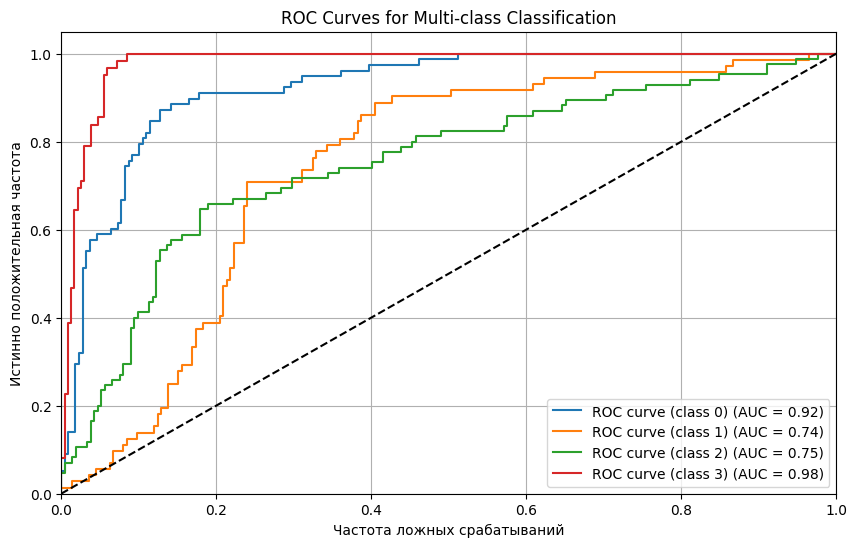


Detailed classification report:
              precision    recall  f1-score   support

         bus       0.68      0.91      0.78        78
        opel       0.49      0.40      0.44        72
        saab       0.53      0.34      0.41        85
         van       0.78      0.98      0.87        62

    accuracy                           0.64       297
   macro avg       0.62      0.66      0.63       297
weighted avg       0.61      0.64      0.61       297


Выбранное количество компонентов: 3
Total explained variance ratio: 0.968


In [85]:
def create_and_evaluate_pca_logistic_pipeline(X_train, X_test, y_train, y_test):
    """
    Создает и оценивает конвейер, сочетающий PCA и логистическую регрессию.

    Периметры:
    -----------
    X_train : массив, подобный массиву (n_samples, n_features)
       Обучающие данные
    X_test : форма, подобная массиву (n_samples, n_features)
        Тестовые данные
    y_train : форма, подобная массиву (n_samples,)
        Обучающие метки
    y_test : форма, подобная массиву (n_samples,)
        Текстовые метки

    Возвращается:
    --------
    кортеж
        (best_model, y_pred, y_pred_proba)
    """
    # CСоздаем pipeline
    pipeline = Pipeline([
        ('pca', PCA()),
        ('logistic', LogisticRegression(
            multi_class='multinomial',
            solver='saga',
            tol=1e-3,
            max_iter=500,
            random_state=42
        ))
    ])

    # Определение сетки параметров
    param_grid = {
        'pca__n_components': [0.85, 0.9, 0.95, 0.99],  # Explained variance ratios
        'logistic__C': [0.001, 0.01, 0.1, 1, 10],
        'logistic__penalty': ['l2']
    }

    print("Starting grid search...")
    # ПОиск по сетке
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    # Печать лучших параметров и score
    print("\n-наилучшие параметры:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

    # Get best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)

    # Calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print("\nПроизводительность тестового набора:")
    print(f"F1 Score: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")

    # Plot ROC curve
    plot_roc_curves(y_test, y_pred_proba, np.unique(y_train))

    # Вывод подробного отчета о классификации
    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred))

    # Вывод explained variance ratio для выбранного количества компонентов
    n_components = best_model.named_steps['pca'].n_components_
    explained_var_ratio = np.sum(best_model.named_steps['pca'].explained_variance_ratio_)
    print(f"\nВыбранное количество компонентов: {n_components}")
    print(f"Total explained variance ratio: {explained_var_ratio:.3f}")

    return best_model, y_pred, y_pred_proba

def plot_roc_curves(y_test, y_pred_proba, classes):
    """
    Построение ROC-кривых для многоклассовой классификации.

    Параметры:
    -----------
    y_test : массивоподобный
        Истинные метки
    y_pred_probe : массивоподобный
        Предсказанные вероятности
    кclasses : массивоподобные
        Уникальные метки классов
    """
    n_classes = len(classes)
    y_test_bin = label_binarize(y_test, classes=classes)

    plt.figure(figsize=(10, 6))

    # Вычисление кривуой ROC и площади ROC для каждого класса
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i],
                label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Частота ложных срабатываний')
    plt.ylabel('Истинно положительная частота')
    plt.title('ROC Curves for Multi-class Classification')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Пример использования:
if __name__ == "__main__":
    print("Запуск PCA-Logistic Regression pipeline...")
    best_model, y_pred, y_pred_proba = create_and_evaluate_pca_logistic_pipeline(
        X_train_processed,
        X_test_processed,
        y_train,
        y_test
    )


Преимущества конвейера:

Объединяет PCA и логистическую регрессию в единую оценку

Обеспечивает надлежащее разделение обучающих и тестовых данных

Последовательно обрабатывает все преобразования

Повышает надежность перекрестной проверки

Оптимизирует гиперпараметры:

Выполняет поиск по различным коэффициентам дисперсии PCA

Оптимизирует эффективность регуляризации логистической регрессии

Использует 5-кратную перекрестную проверку

Оптимизирует взвешенный показатель F1 из-за потенциального дисбаланса в классе

Оценка:

Вычисляет как показатели F1, так и показатели точности

Создает ROC-кривые для каждого класса

Предоставляет подробный отчет о классификации

Показывает информацию об объясненных отклонениях

Ключевые улучшения по сравнению с базовой логистической регрессией:

Повышение надежности за счет уменьшения размерности

Потенциально лучшее обобщение

Снижение мультиколлинеарности

Более эффективные вычисления за счет уменьшения размеров

Конвейерный подход гарантирует, что:

PCA применяется только к обучающим данным

Такое же преобразование применяется к тестовым данным

Во время перекрестной проверки не происходит утечки данных

Весь процесс более воспроизводим и удобен в обслуживании


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [86]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

In [88]:
pip install scikit-learn numpy matplotlib seaborn

In [93]:
def train_and_evaluate_decision_tree(X_train, X_test, y_train, y_test):
    """
    Обучите классификатора дерева решений настройке гиперпараметров и оценка его производительности

    Parameters:
    -----------
    X_train : array-like of shape (n_samples, n_features)
        Training data
    X_test : array-like of shape (n_samples, n_features)
        Test data
    y_train : array-like of shape (n_samples,)
        Training labels
    y_test : array-like of shape (n_samples,)
        Test labels

    Returns:
    --------
    tuple : (best_model, y_pred, y_pred_proba)
        - best_model: Trained DecisionTreeClassifier with best parameters
        - y_pred: Predictions on test set
        - y_pred_proba: Prediction probabilities on test set
    """
    # Define parameter grid for depth search
    param_grid = {
        'max_depth': range(3, 21, 2),  # Test depths from 3 to 20
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize base model
    base_tree = DecisionTreeClassifier(random_state=42)

    # Perform grid search
    print("Выполнение поиска по сетке..")
    grid_search = GridSearchCV(
        base_tree,
        param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Print best parameters and cross-validation score
    print("\nBest Parameters:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

    # Make predictions
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)

    # Calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print("\nTest Set Results:")
    print(f"F1 Score: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")

    # Create visualizations
    create_tree_visualizations(best_model, X_train, feature_importance=True)
    create_learning_curve(X_train, y_train, X_test, y_test, grid_search.best_params_)

    # Cross-validation with different metrics
    print_cross_validation_results(best_model, X_train, y_train)

    return best_model, y_pred, y_pred_proba



In [102]:
def create_tree_visualizations(model, X_train, feature_importance=True):
    """Создание визуализации дерева решений и график важности объектов"""
    # Plot decision tree visualization (limited to max_depth=3 for visibility)
    plt.figure(figsize=(20,10))
    plot_tree(model, max_depth=3, filled=True,
              feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])
    plt.title("Визуализация дерева решений (ограничена глубиной 3)")
    plt.tight_layout()
    plt.show()

    if feature_importance:
        # Plot feature importance
        feature_importance = model.feature_importances_
        plt.figure(figsize=(10,6))
        sns.barplot(x=range(len(feature_importance)), y=feature_importance)
        plt.title("Важность функции")
        plt.xlabel("Индекс параметра")
        plt.ylabel("Значимость")
        plt.tight_layout()
        plt.show()



In [99]:
def create_learning_curve(X_train, y_train, X_test, y_test, best_params):
    """Создание и построение графика обучения"""
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for size in train_sizes:
        n_samples = int(len(X_train) * size)
        model = DecisionTreeClassifier(**best_params, random_state=42)
        model.fit(X_train[:n_samples], y_train[:n_samples])

        train_scores.append(f1_score(y_train[:n_samples],
                                   model.predict(X_train[:n_samples]),
                                   average='weighted'))
        test_scores.append(f1_score(y_test, model.predict(X_test),
                                  average='weighted'))

    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_scores, label='Training score')
    plt.plot(train_sizes, test_scores, label='Test score')
    plt.xlabel('Training Set Size Ratio')
    plt.ylabel('F1 Score')
    plt.title('Кривая обучения')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [100]:
def print_cross_validation_results(model, X_train, y_train):
    """Печать результатов перекрестной проверки для различных показателей"""
    metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
    print("\nCross-validation results for different metrics:")
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train,
                               cv=5, scoring=metric)
        print(f"{metric}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")



Классификатор дерева решений для обучения и оценки...
Выполнение поиска по сетке..

Best Parameters:
{'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.713

Test Set Results:
F1 Score: 0.688
Accuracy: 0.690


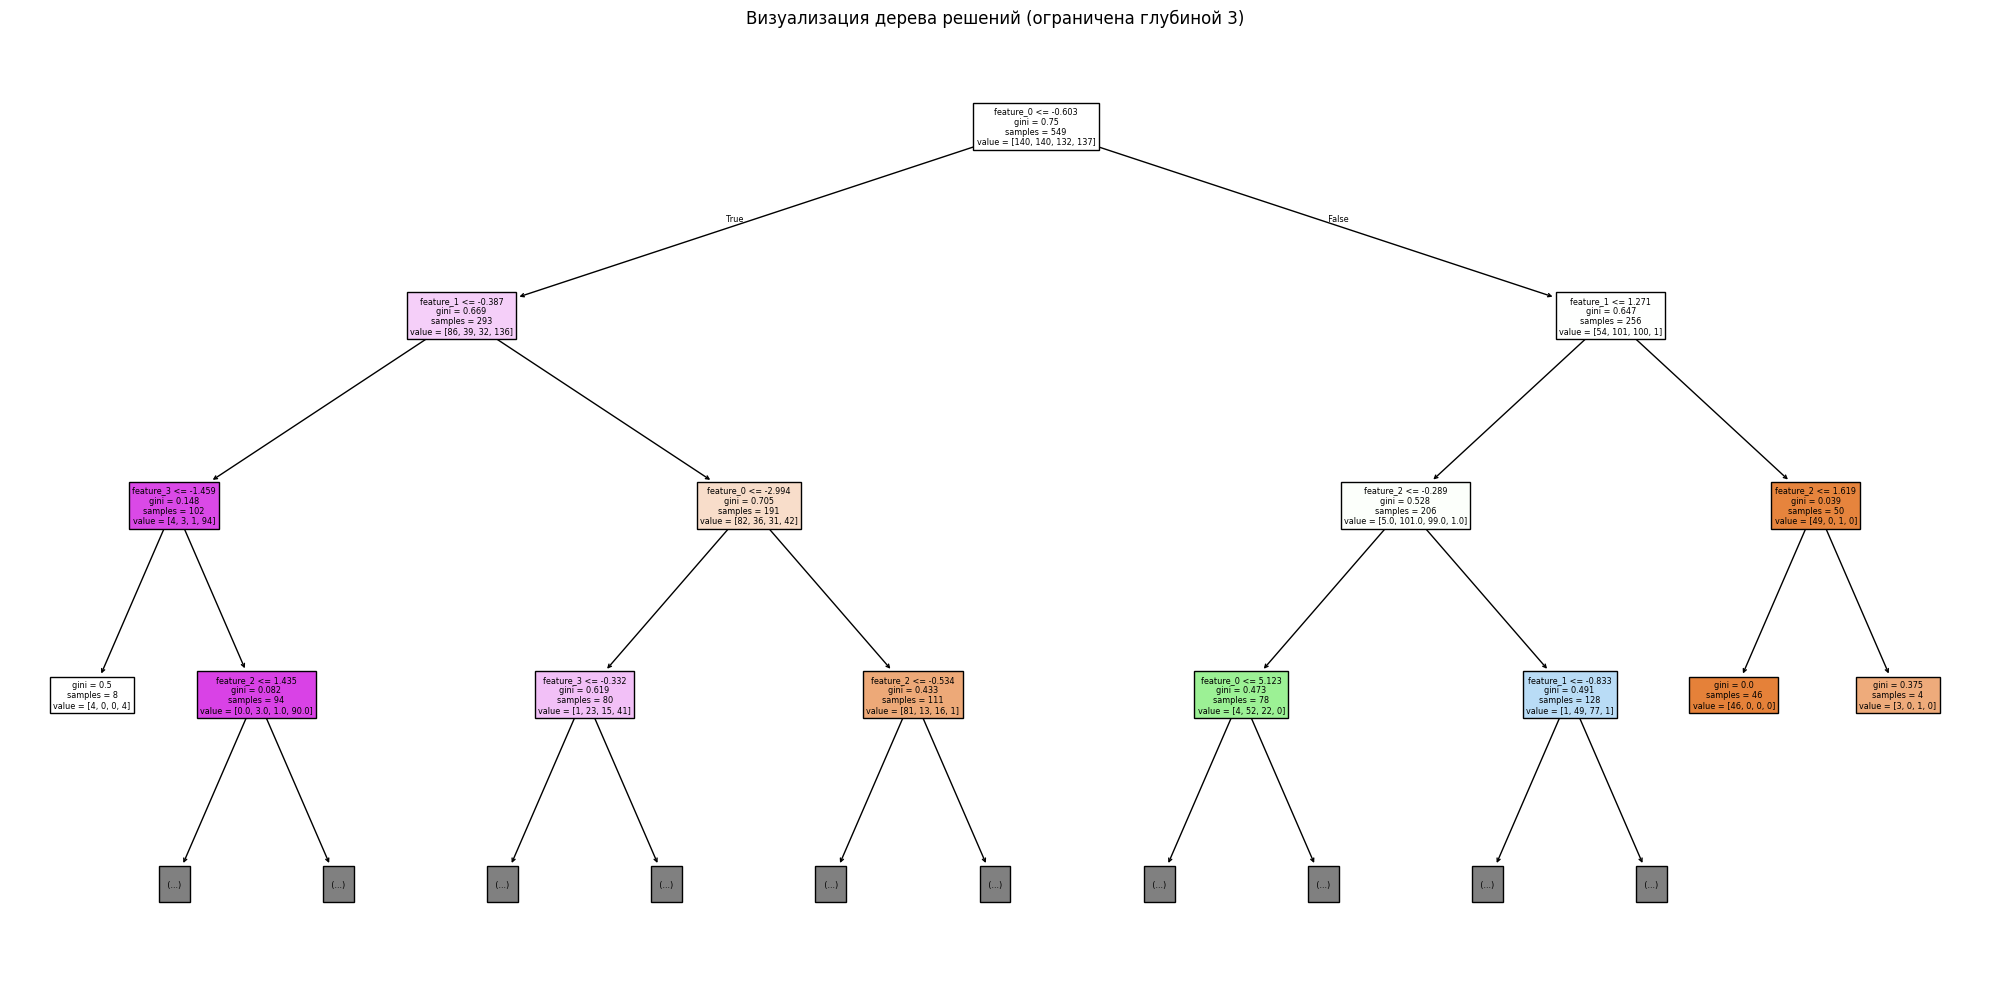

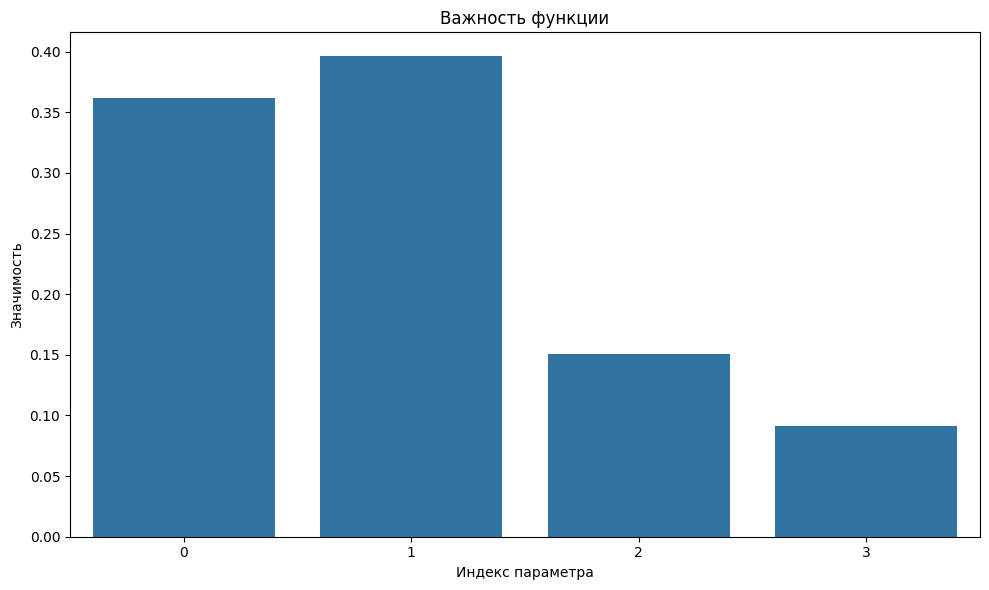

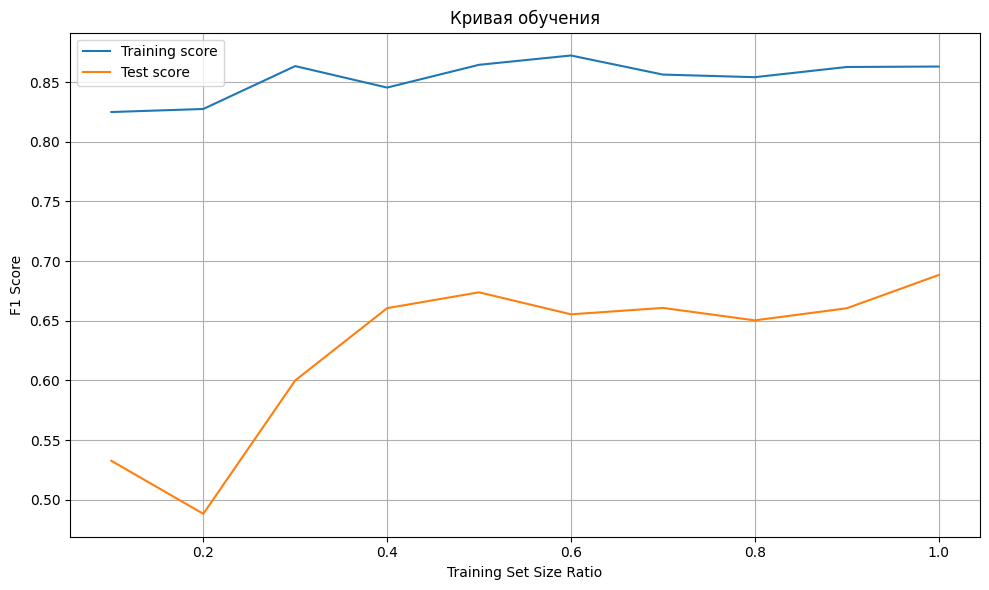


Cross-validation results for different metrics:
accuracy: 0.714 (+/- 0.084)
f1_weighted: 0.713 (+/- 0.085)
precision_weighted: 0.719 (+/- 0.086)
recall_weighted: 0.714 (+/- 0.084)


In [103]:
# Usage example:
if __name__ == "__main__":
    print("Классификатор дерева решений для обучения и оценки...")
    best_tree_model, y_pred, y_pred_proba = train_and_evaluate_decision_tree(
        X_train_processed,
        X_test_processed,
        y_train,
        y_test
    )

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
# YOUR CODE HERE

In [113]:
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [118]:
def preprocess_labels(y_train, y_test):
    """
   Предварительная обработка меток для обеспечения согласованного кодирования

    Parameters:
    -----------
    y_train : array-like
        Training labels
    y_test : array-like
        Test labels

    Returns:
    --------
    tuple : (encoded_y_train, encoded_y_test, label_encoder)
    """

    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # Initialize and fit label encoder
    le = LabelEncoder()
    # Тренируем на обоих train и test чтобы убедиться, что все классы известны
    le.fit(np.concatenate([y_train, y_test]))

    # Преобразование
    y_train_encoded = le.transform(y_train)
    y_test_encoded = le.transform(y_test)

    return y_train_encoded, y_test_encoded, le

def optimize_base_models(X_train, y_train):
    """
    Оптимизация гиперпараметров для базовых моделей с помощью поиска по сетке
    """
    # Сетка параметров логистической регрессии
    lr_param_grid = {
        'C': [0.1, 1, 10, 100],
        'tol': [1e-4, 1e-3, 1e-2]
    }

    # Decision Tree сетка параметров
    dt_param_grid = {
        'max_depth': range(3, 21, 2),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Оптимизация Logistic Regression
    print("Оптимизация Logistic Regressionn...")
    lr_base = LogisticRegression(multi_class='multinomial',
                                solver='saga',
                                max_iter=500,
                                random_state=42)
    lr_search = GridSearchCV(lr_base, lr_param_grid, cv=5,
                           scoring='f1_weighted', n_jobs=-1)
    lr_search.fit(X_train, y_train)

    # Оптимизация дерева решений
    print("Оптимизация дерева решений...")
    dt_base = DecisionTreeClassifier(random_state=42)
    dt_search = GridSearchCV(dt_base, dt_param_grid, cv=5,
                           scoring='f1_weighted', n_jobs=-1)
    dt_search.fit(X_train, y_train)

    return lr_search, dt_search

def create_and_evaluate_bagging(X_train, X_test, y_train, y_test, base_estimator,
                              n_min=2, n_max=100, step=5):
    """
    Создание и оценка bagging ансамбля с различными размерами
    """
    # Инициализация массива для хранения метрик
    n_estimators_range = range(n_min, n_max + 1, step)
    f1_scores = []
    accuracy_scores = []

    # Создание ансамбля максимального размера
    print(f"Тренировочный базовый ансамбль с {n_max} оценок...")
    try:
        bagging = BaggingClassifier(
            estimator=base_estimator,
            n_estimators=n_max,
            random_state=42,
            n_jobs=-1
        )
    except TypeError:
        # Fallback for older scikit-learn versions
        warnings.warn("Переход к более старому scikit-learn API")
        bagging = BaggingClassifier(
            base_estimator=base_estimator,
            n_estimators=n_max,
            random_state=42,
            n_jobs=-1
        )

    bagging.fit(X_train, y_train)

    # Evaluate ensembles of different sizes
    print("Оценка различных размеров ансамблей...")
    for n in tqdm(n_estimators_range):
        # Get predictions from first n estimators
        predictions = np.array([estimator.predict(X_test)
                              for estimator in bagging.estimators_[:n]])
        # Average predictions
        ensemble_pred = np.apply_along_axis(
            lambda x: np.bincount(x).argmax(),
            axis=0,
            arr=predictions
        )

        # Calculate metrics
        f1 = f1_score(y_test, ensemble_pred, average='weighted')
        acc = accuracy_score(y_test, ensemble_pred)

        f1_scores.append(f1)
        accuracy_scores.append(acc)

    return n_estimators_range, f1_scores, accuracy_scores

In [119]:
def evaluate_single_models(X_train, X_test, y_train, y_test, lr_model, dt_model):
    """Оценка индивидуальных моделей без bagging"""
    # Обучение и оценка одной Logistic Regression
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    single_lr_f1 = f1_score(y_test, lr_pred, average='weighted')

    # TОбучение и оценка одного Decision Tree
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    single_dt_f1 = f1_score(y_test, dt_pred, average='weighted')

    return single_lr_f1, single_dt_f1

def plot_ensemble_results(lr_sizes, dt_sizes, lr_f1, lr_acc, dt_f1, dt_acc):
    """Результаты построения ансамбля графиков"""
    plt.figure(figsize=(15, 6))

    # F1 Score plot
    plt.subplot(1, 2, 1)
    plt.plot(list(lr_sizes), lr_f1, label='Logistic Regression', marker='o')
    plt.plot(list(dt_sizes), dt_f1, label='Decision Tree', marker='s')
    plt.xlabel('Ensemble Size')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Ensemble Size')
    plt.grid(True)
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(list(lr_sizes), lr_acc, label='Logistic Regression', marker='o')
    plt.plot(list(dt_sizes), dt_acc, label='Decision Tree', marker='s')
    plt.xlabel('Ensemble Size')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Ensemble Size')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

Preprocessing labels...
Оптимизация Logistic Regressionn...
Оптимизация дерева решений...

Best Parameters:
Logistic Regression: {'C': 1, 'tol': 0.01}
Decision Tree: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 10}

Training Logistic Regression Ensemble...
Тренировочный базовый ансамбль с 100 оценок...
Оценка различных размеров ансамблей...


100%|██████████| 20/20 [00:00<00:00, 52.52it/s]



Training Decision Tree Ensemble...
Тренировочный базовый ансамбль с 100 оценок...
Оценка различных размеров ансамблей...


100%|██████████| 20/20 [00:00<00:00, 48.99it/s]


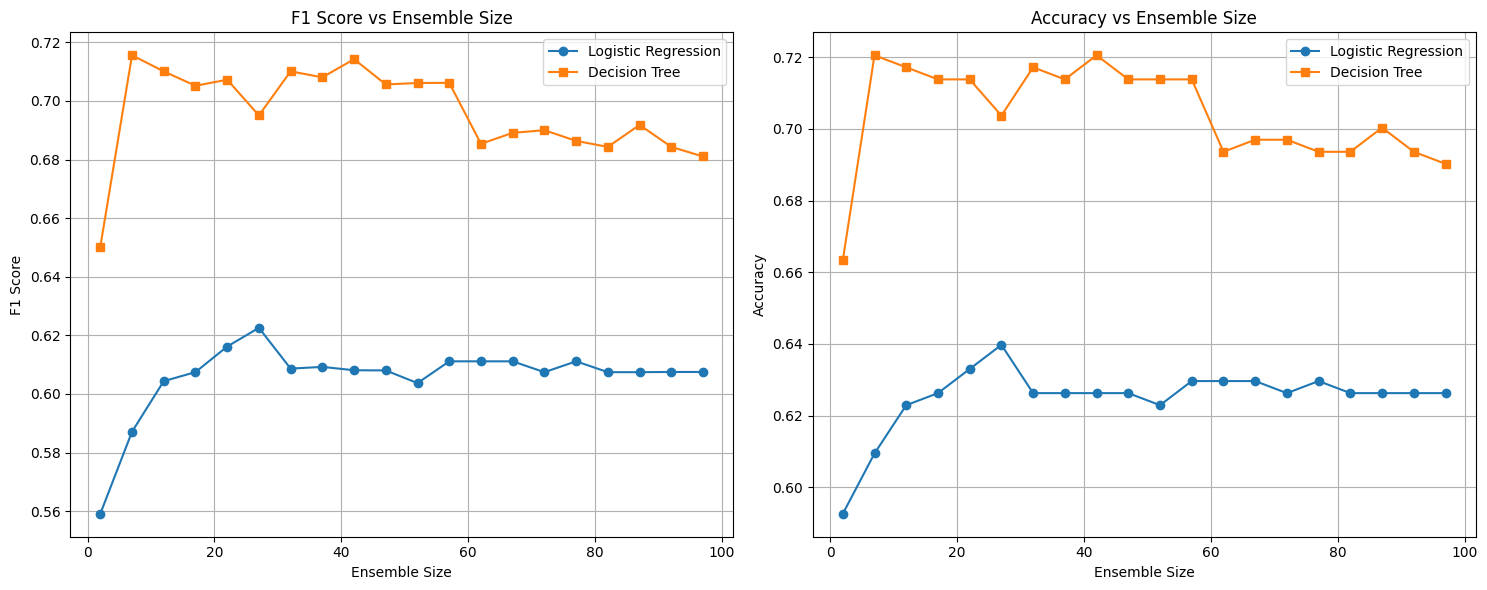


Оптимальные размеры ансамбля:
Logistic Regression: 27 estimators (F1: 0.623)
Decision Tree: 7 estimators (F1: 0.716)

Повышение производительности:
Logistic Regression:
Single model F1: 0.600
Ensemble F1: 0.623
Улучшение: 2.3%

Decision Tree:
Single model F1: 0.688
Ensemble F1: 0.716
Улучшение: 2.7%


In [123]:
def main(X_train, X_test, y_train, y_test):
    """Main function to run the complete analysis"""
    # Метки предварительной обработки
    print("Preprocessing labels...")
    y_train_encoded, y_test_encoded, label_encoder = preprocess_labels(y_train, y_test)

    # Оптимизация базовых моделей
    lr_search, dt_search = optimize_base_models(X_train, y_train_encoded)

    # Создание оптимизированных базовых моделей
    lr_model = LogisticRegression(
        C=lr_search.best_params_['C'],
        tol=lr_search.best_params_['tol'],
        multi_class='multinomial',
        solver='saga',
        max_iter=500,
        random_state=42
    )

    dt_model = DecisionTreeClassifier(
        max_depth=dt_search.best_params_['max_depth'],
        min_samples_split=dt_search.best_params_['min_samples_split'],
        min_samples_leaf=dt_search.best_params_['min_samples_leaf'],
        random_state=42
    )

    # Печать наилучших параметров
    print("\nBest Parameters:")
    print("Logistic Regression:", lr_search.best_params_)
    print("Decision Tree:", dt_search.best_params_)

    # Оценка отдельных моделей
    single_lr_f1, single_dt_f1 = evaluate_single_models(
        X_train, X_test, y_train_encoded, y_test_encoded, lr_model, dt_model
    )

    # ТТрейн и оценка оба типа ансамблей
    print("\nTraining Logistic Regression Ensemble...")
    lr_sizes, lr_f1, lr_acc = create_and_evaluate_bagging(
        X_train, X_test, y_train_encoded, y_test_encoded, lr_model
    )

    print("\nTraining Decision Tree Ensemble...")
    dt_sizes, dt_f1, dt_acc = create_and_evaluate_bagging(
        X_train, X_test, y_train_encoded, y_test_encoded, dt_model
    )

    # Результаты построения графика
    plot_ensemble_results(lr_sizes, dt_sizes, lr_f1, lr_acc, dt_f1, dt_acc)

    # Оптимальные размеры ансамбля
    lr_optimal_size = list(lr_sizes)[np.argmax(lr_f1)]
    dt_optimal_size = list(dt_sizes)[np.argmax(dt_f1)]

    # Печать результата
    print("\nОптимальные размеры ансамбля:")
    print(f"Logistic Regression: {lr_optimal_size} estimators (F1: {max(lr_f1):.3f})")
    print(f"Decision Tree: {dt_optimal_size} estimators (F1: {max(dt_f1):.3f})")

    print("\nПовышение производительности:")
    print("Logistic Regression:")
    print(f"Single model F1: {single_lr_f1:.3f}")
    print(f"Ensemble F1: {max(lr_f1):.3f}")
    print(f"Улучшение: {(max(lr_f1) - single_lr_f1) * 100:.1f}%")

    print("\nDecision Tree:")
    print(f"Single model F1: {single_dt_f1:.3f}")
    print(f"Ensemble F1: {max(dt_f1):.3f}")
    print(f"Улучшение: {(max(dt_f1) - single_dt_f1) * 100:.1f}%")

    return label_encoder

if __name__ == "__main__":

    label_encoder = main(X_train_processed, X_test_processed, y_train, y_test)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [124]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE


Оптимальное количество деревьев (F1): 31
Оптимальное количество деревьев (Accuracy): 31
Best F1 Score: 0.741
Best Accuracy: 0.744


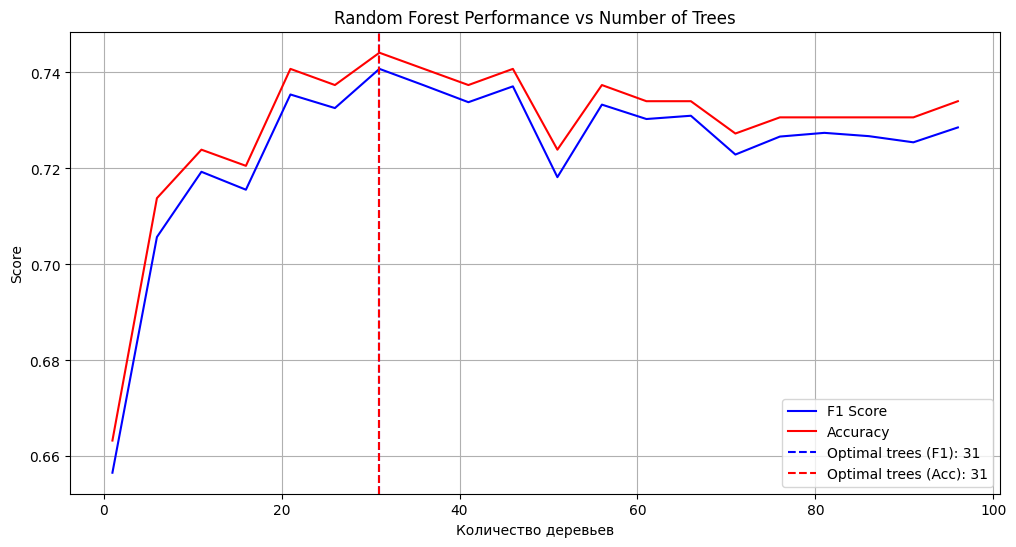

In [126]:
def analyze_random_forest_performance(X_train, X_test, y_train, y_test, max_trees=100):
    """
    Анализ производительности случайного леса с различным количеством деревьев.
    Возвращает показатели производительности и отображает результаты на графике.
    """
    # Тест разного количества деревьев
    n_trees_range = np.arange(1, max_trees + 1, 5)
    f1_scores = []
    accuracy_scores = []

    #Подсчет scores за каждое количество деревьев
    for n_trees in n_trees_range:
        # Запуск и train Random Forest
        rf = RandomForestClassifier(
            n_estimators=n_trees,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)

        # Делаем прогнозы
        y_pred = rf.predict(X_test)

        # Высчиьываем метрики
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        f1_scores.append(f1)
        accuracy_scores.append(accuracy)

    # Ищем оптимальное количество деревьев
    optimal_trees_f1 = n_trees_range[np.argmax(f1_scores)]
    optimal_trees_acc = n_trees_range[np.argmax(accuracy_scores)]

    # График результатов
    plt.figure(figsize=(12, 6))

    plt.plot(n_trees_range, f1_scores, 'b-', label='F1 Score')
    plt.plot(n_trees_range, accuracy_scores, 'r-', label='Accuracy')

    plt.axvline(x=optimal_trees_f1, color='b', linestyle='--',
                label=f'Optimal trees (F1): {optimal_trees_f1}')
    plt.axvline(x=optimal_trees_acc, color='r', linestyle='--',
                label=f'Optimal trees (Acc): {optimal_trees_acc}')

    plt.xlabel('Количество деревьев')
    plt.ylabel('Score')
    plt.title('Зависимость производительности случайного леса от количества деревьев')
    plt.legend()
    plt.grid(True)

    # TТренируем оптимальную модель
    optimal_rf = RandomForestClassifier(
        n_estimators=optimal_trees_f1,
        random_state=42,
        n_jobs=-1
    )
    optimal_rf.fit(X_train, y_train)

    # Печать результатов
    print(f"\nОптимальное количество деревьев (F1): {optimal_trees_f1}")
    print(f"Оптимальное количество деревьев (Accuracy): {optimal_trees_acc}")
    print(f"Best F1 Score: {max(f1_scores):.3f}")
    print(f"Best Accuracy: {max(accuracy_scores):.3f}")

    return optimal_rf, n_trees_range, f1_scores, accuracy_scores

# Run the analysis
optimal_rf, n_trees_range, f1_scores, accuracy_scores = analyze_random_forest_performance(
    X_train_processed, X_test_processed, y_train, y_test
)

plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [ ]:
# YOUR CODE HERE

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
# YOUR CODE HERE